**Question 1**

Given two strings s1 and s2, return *the lowest **ASCII** sum of deleted characters to make two strings equal*.

**Example 1:**

**Input:** s1 = "sea", s2 = "eat"

**Output:** 231

**Explanation:** Deleting "s" from "sea" adds the ASCII value of "s" (115) to the sum.

Deleting "t" from "eat" adds 116 to the sum.

At the end, both strings are equal, and 115 + 116 = 231 is the minimum sum possible to achieve this.

In [3]:
def lowest_ascii_sum(s1, s2):
    res = []
    output = 0
    # Traversing on each element of s1 and finding the odd
    for i in s1:
        if i not in s2:
            res.append(i)
    # Traversing on each element of s2 and finding the odd
    for j in s2:
        if j not in s1:
            res.append(j)
    # Finding the sum of asii value
    for k in range(len(res)):
        output+=ord(res[k])
    return output
    
    
s1 = "sea"
s2 = "eat"
lowest_ascii_sum(s1, s2)

231

TC: O(s1+s1)
    
SC: O(n)

**Question 2**

Given a string s containing only three types of characters: '(', ')' and '*', return true *if* s *is **valid***.

The following rules define a **valid** string:

- Any left parenthesis '(' must have a corresponding right parenthesis ')'.
- Any right parenthesis ')' must have a corresponding left parenthesis '('.
- Left parenthesis '(' must go before the corresponding right parenthesis ')'.
- '*' could be treated as a single right parenthesis ')' or a single left parenthesis '(' or an empty string "".

**Example 1:**

**Input:** s = "()"

**Output:**

true

In [12]:
class Solution:
    def checkValidString(self, s):
        open_count= 0
        close_count= 0
        l = len(s) -1
        for i in range(len(s)):
            if s[i]=='(' or s[i]=='*':
                open_count+=1
            else:
                open_count-=1
            if s[l-i]==')' or s[l-i]=='*':
                close_count+=1
            else:
                close_count-=1
            if open_count<0 or close_count<0:
                return False
        return True

s = Solution()
str = "()"
s.checkValidString(str)

True

TC: O(n2)
    
SC: O(n)

**Question 3**

Given two strings word1 and word2, return *the minimum number of **steps** required to make* word1 *and* word2 *the same*.

In one **step**, you can delete exactly one character in either string.

**Example 1:**

**Input:** word1 = "sea", word2 = "eat"

**Output:** 2

**Explanation:** You need one step to make "sea" to "ea" and another step to make "eat" to "ea".

In [15]:
def min_step(word1, word2):
    step = 0
    for word in word1:
        if word not in word2:
            word1.replace(word, '')
            step+=1
    for word in word2:
        if word not in word1:
            word2.replace(word, '')
            step+=1
    return step

word1 = "sea"
word2 = "eat"
min_step(word1, word2)

2

TC: O(n)
    
SC: O(1)

**Question 4**

You need to construct a binary tree from a string consisting of parenthesis and integers.

The whole input represents a binary tree. It contains an integer followed by zero, one or two pairs of parenthesis. The integer represents the root's value and a pair of parenthesis contains a child binary tree with the same structure.
You always start to construct the **left** child node of the parent first if it exists.

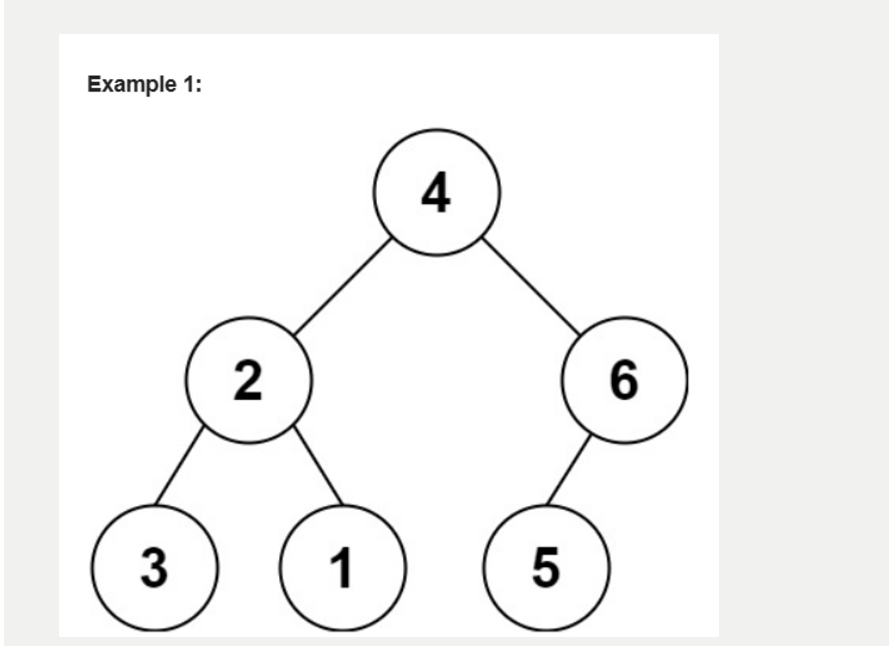

**Input:** s = "4(2(3)(1))(6(5))"

**Output:** [4,2,6,3,1,5]

In [26]:
class TreeNode:
    def __init__(self, data):
        self.val = data
        self.left = None
        self.right = None

def preorder(root):
    result = []
    if root is not None:
        result.append(root.val)
        result += preorder(root.left)
        result += preorder(root.right)
    return result

class Solution:
    def solve(self, s, idx):
        if idx >= len(s):
            return None
        num = ""
        while idx < len(s) and s[idx] != '(' and s[idx] != ')':
            num += s[idx]
            idx += 1
            node = TreeNode(int(num))
        if idx < len(s) and s[idx] == '(':
            idx += 1
            node.left = self.solve(s, idx)
            idx += 1
        if idx < len(s) and s[idx] == '(':
            idx += 1
            node.right = self.solve(s, idx)
            idx += 1
        return node

    def str2tree(self, s):
        idx = 0
        temp = TreeNode(-1)
        return self.solve(s, idx)

ob = Solution()
root = ob.str2tree("4(2(3)(1))(6(5))")
result = preorder(root)
print(result)

[4, 2, 3, 3]


TC: O(n)
    
SC: O(n)

**Question 5**

Given an array of characters chars, compress it using the following algorithm:

Begin with an empty string s. For each group of **consecutive repeating characters** in chars:

- If the group's length is 1, append the character to s.
- Otherwise, append the character followed by the group's length.

The compressed string s **should not be returned separately**, but instead, be stored **in the input character array chars**. Note that group lengths that are 10 or longer will be split into multiple characters in chars.

After you are done **modifying the input array,** return *the new length of the array*.

You must write an algorithm that uses only constant extra space.

**Example 1:**

**Input:** chars = ["a","a","b","b","c","c","c"]

**Output:** Return 6, and the first 6 characters of the input array should be: ["a","2","b","2","c","3"]

**Explanation:**

The groups are "aa", "bb", and "ccc". This compresses to "a2b2c3".

In [10]:
ind = 0

def gen_compressed_str(string):
    global ind
    comp_str = ""
    len_str = len(string)
    while (ind != len_str):
        count = 1

        while ((ind < (len_str-1)) and (string[ind] == string[ind+1])):
            count = count + 1
            ind = ind + 1


        if (count == 1):
            comp_str = comp_str + str(string[ind])
        else:
            comp_str = comp_str + str(string[ind]) + str(count)
    
        ind = ind + 1

    return comp_str
      


string = "a","a","b","b","c","c","c"
print(gen_compressed_str(string))

a2b2c3


TC: O(n2)
    
SC: O(n)

**Question 6**

Given two strings s and p, return *an array of all the start indices of* p*'s anagrams in* s. You may return the answer in **any order**.

An **Anagram** is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

**Example 1:**

**Input:** s = "cbaebabacd", p = "abc"

**Output:** [0,6]

**Explanation:**

The substring with start index = 0 is "cba", which is an anagram of "abc".

The substring with start index = 6 is "bac", which is an anagram of "abc".

In [14]:
import collections

class Solution(object):
    def findAnagrams(self, s, p):
        res = []
        c = collections.Counter(p)
        cur = collections.Counter(s[:len(p)])
        for i in range(len(s)-len(p)+1):
            if cur==c:
                res.append(i)
            if i == len(s)-len(p):
                break
            cur[s[i]]-=1
            if cur[s[i]]==0:
                del cur[s[i]]
            cur[s[i+len(p)]]+=1
        return res
    
    
s = Solution()
string = "cbaebabacd"
p = "abc"
s.findAnagrams(string, p)

[0, 6]

TC: O(s+p)
    
SC: O(n)

**Question 7**

Given an encoded string, return its decoded string.

The encoding rule is: k[encoded_string], where the encoded_string inside the square brackets is being repeated exactly k times. Note that k is guaranteed to be a positive integer.

You may assume that the input string is always valid; there are no extra white spaces, square brackets are well-formed, etc. Furthermore, you may assume that the original data does not contain any digits and that digits are only for those repeat numbers, k. For example, there will not be input like 3a or 2[4].

The test cases are generated so that the length of the output will never exceed 105.

**Example 1:**

**Input:** s = "3[a]2[bc]"

**Output:** "aaabcbc

In [15]:
class Solution:
    def decodeString(self, s: str) -> str:        
        # the decode follows LIFO so just use stack
        curr = "" # this is used to keep the tmp short & the returned long 
        stack = [] # like how DFS functions, holding parameters to pass dwon deeper 
        num = 0
        for char in s:
            if char.isdigit():
                # consider many digits cause overflow 
                num = 10*num + int(char)
                # e.g. 31
                # 3 num = 10*0+3 = 3
                # 1 num = 3*10+1 = 31
            if char=='[': # like entering next round of recursion
                stack.append(num)
                stack.append(curr)
                num = 0
                curr = ""
            if char.isalpha():
                curr+=char
            if char==']': # like returning to former round of recursion
                # now the curr to pop is most middle str that shall be multiplied
                pre_curr_str = stack.pop()
                pre_curr_num = stack.pop()
                # add back to the accumulating
                curr = pre_curr_str + (pre_curr_num*curr)
                
        return curr 
    
s = Solution()
string = "3[a]2[bc]"
s.decodeString(string)

'aaabcbc'

TC: O(n)
    
SC: O(n)

**Question 8**

Given two strings s and goal, return true *if you can swap two letters in* s *so the result is equal to* goal*, otherwise, return* false*.*

Swapping letters is defined as taking two indices i and j (0-indexed) such that i != j and swapping the characters at s[i] and s[j].

- For example, swapping at indices 0 and 2 in "abcd" results in "cbad".

**Example 1:**

**Input:** s = "ab", goal = "ba"

**Output:** true

**Explanation:** You can swap s[0] = 'a' and s[1] = 'b' to get "ba", which is equal to goal.

In [17]:
import collections as c

class Solution:
    def buddyStrings(self, s: str, goal: str) -> bool:
        m, n = len(s), len(goal)
        if m != n:
            return False
        cnt1, cnt2 = c.Counter(s), c.Counter(goal)
        if cnt1 != cnt2:
            return False
        diff = sum(s[i] != goal[i] for i in range(n))
        return diff == 2 or (diff == 0 and any(v > 1 for v in cnt1.values()))
    
    
s = Solution()
string = "ab"
goal = "ba"
s.buddyStrings(string, goal)

True

TC: O(n)
    
SC: O(1)